<a href="https://colab.research.google.com/github/gagan-iitb/DSP505/blob/main/Iris_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#Read dataset
df=pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
#describing about the dataset all fields
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


***Question*: Describe only two specific fields, for example, 'SepalLengthCm' and 'PetalLengthCm'**

In [ ]:
df.shape

(150, 6)

In [ ]:
df.drop('Id',axis=1,inplace=True)

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#count the value
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [ ]:
#finding the null value
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

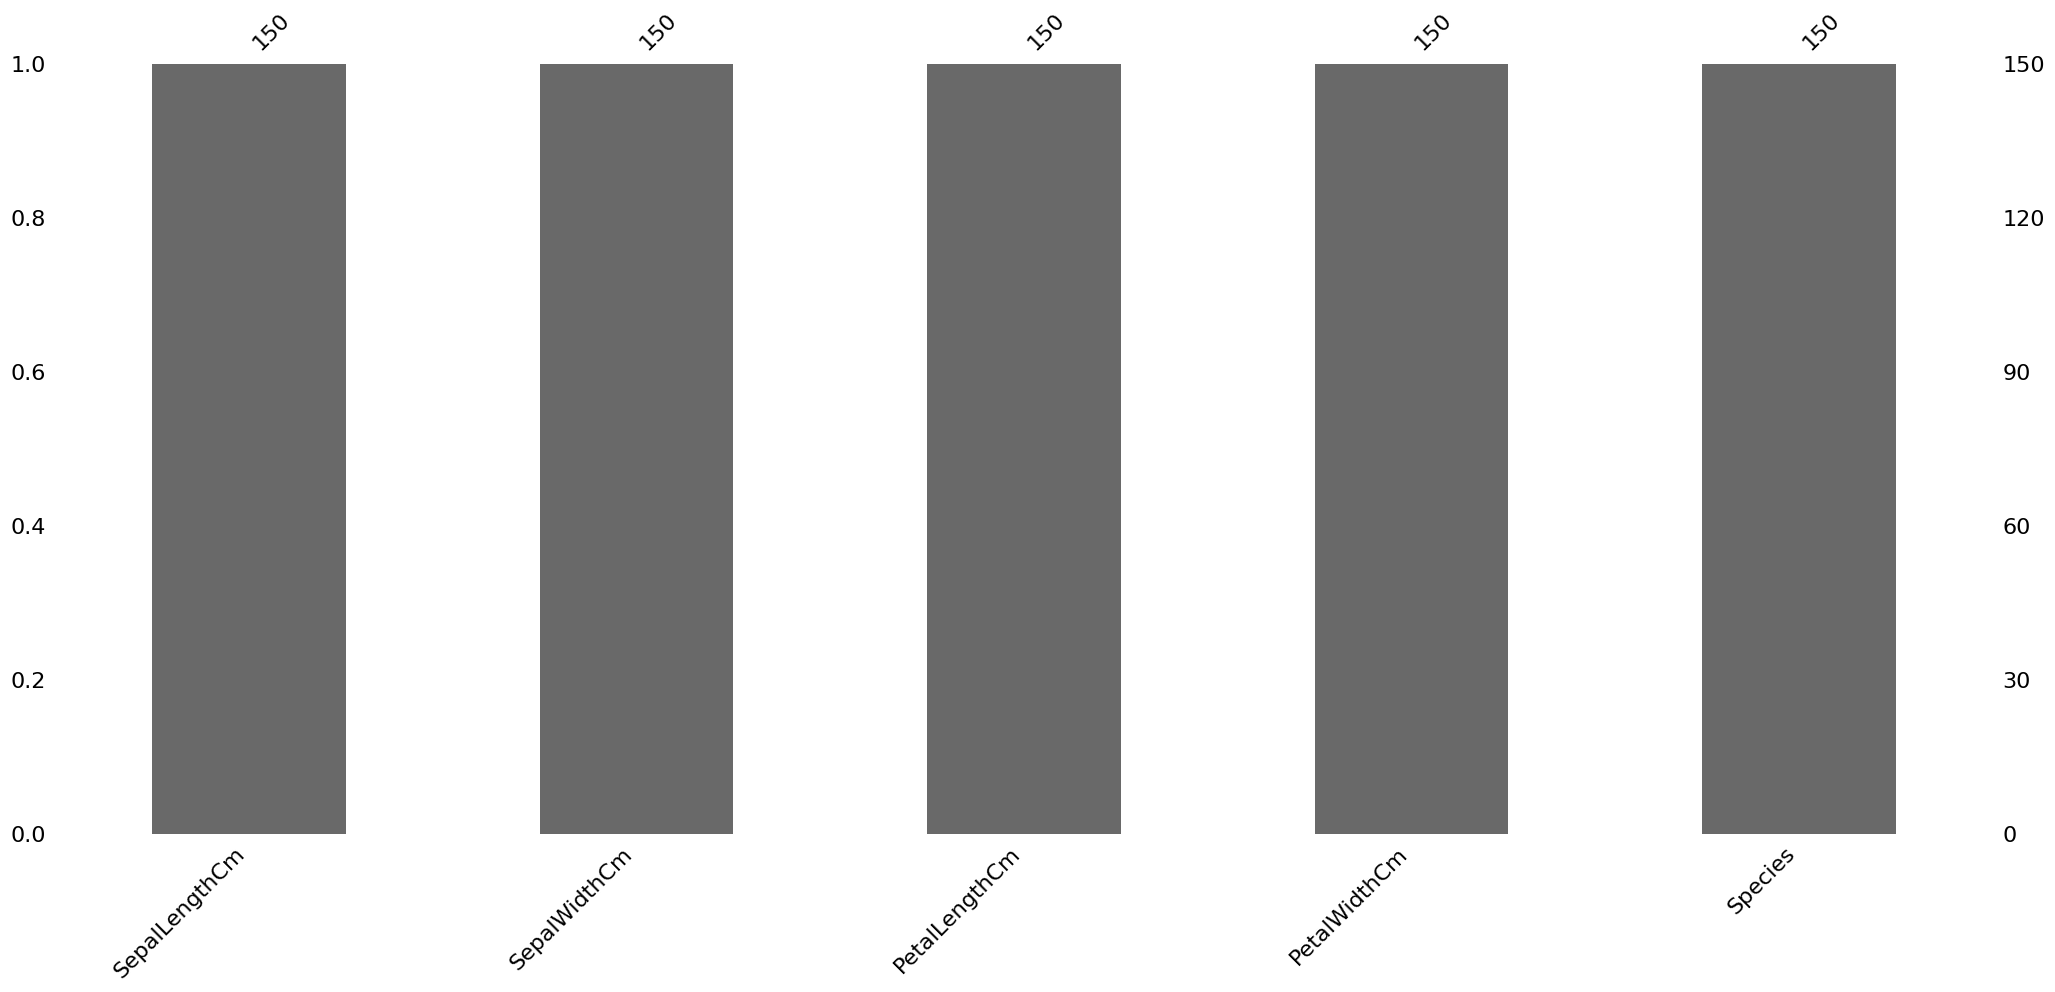

In [ ]:
#Visualizing Missing Data
import missingno as msno
msno.bar(df)

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

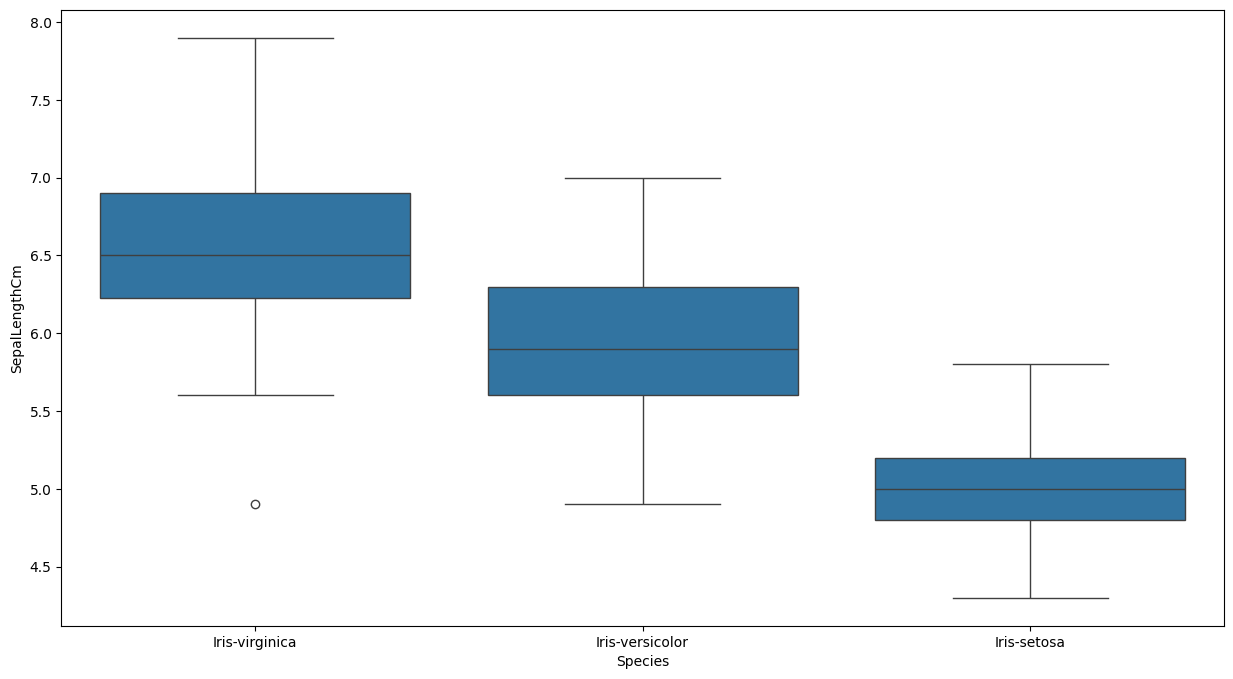

In [ ]:
#Relationship between the species of Iris flowers and their sepal length using a boxplot
#Box: Represents the interquartile range (IQR) of the data (middle 50% of the data).
#Whiskers: Extend from the box to the smallest and largest values within 1.5 times the IQR from the quartiles.
#Median Line: Inside the box, represents the median (50th percentile) of the sepal length for each species.
#Outliers: Points outside the whiskers represent potential outliers.

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
plt.figure(figsize=(15,8))
sns.boxplot(x='Species',y='SepalLengthCm',data=df.sort_values('SepalLengthCm',ascending=False))

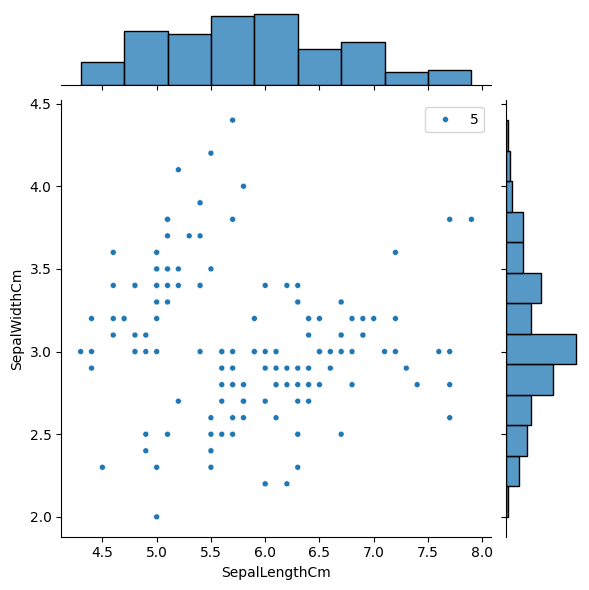

In [ ]:
#Relationship between species and sepal width
#Pattern: Look for patterns or clusters in the scatter plot.
#For instance, if we see that data points of different species form distinct clusters, it might suggest that the species differ significantly in terms of sepal length and width.
df.drop_duplicates(inplace=True)
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df, size=5)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


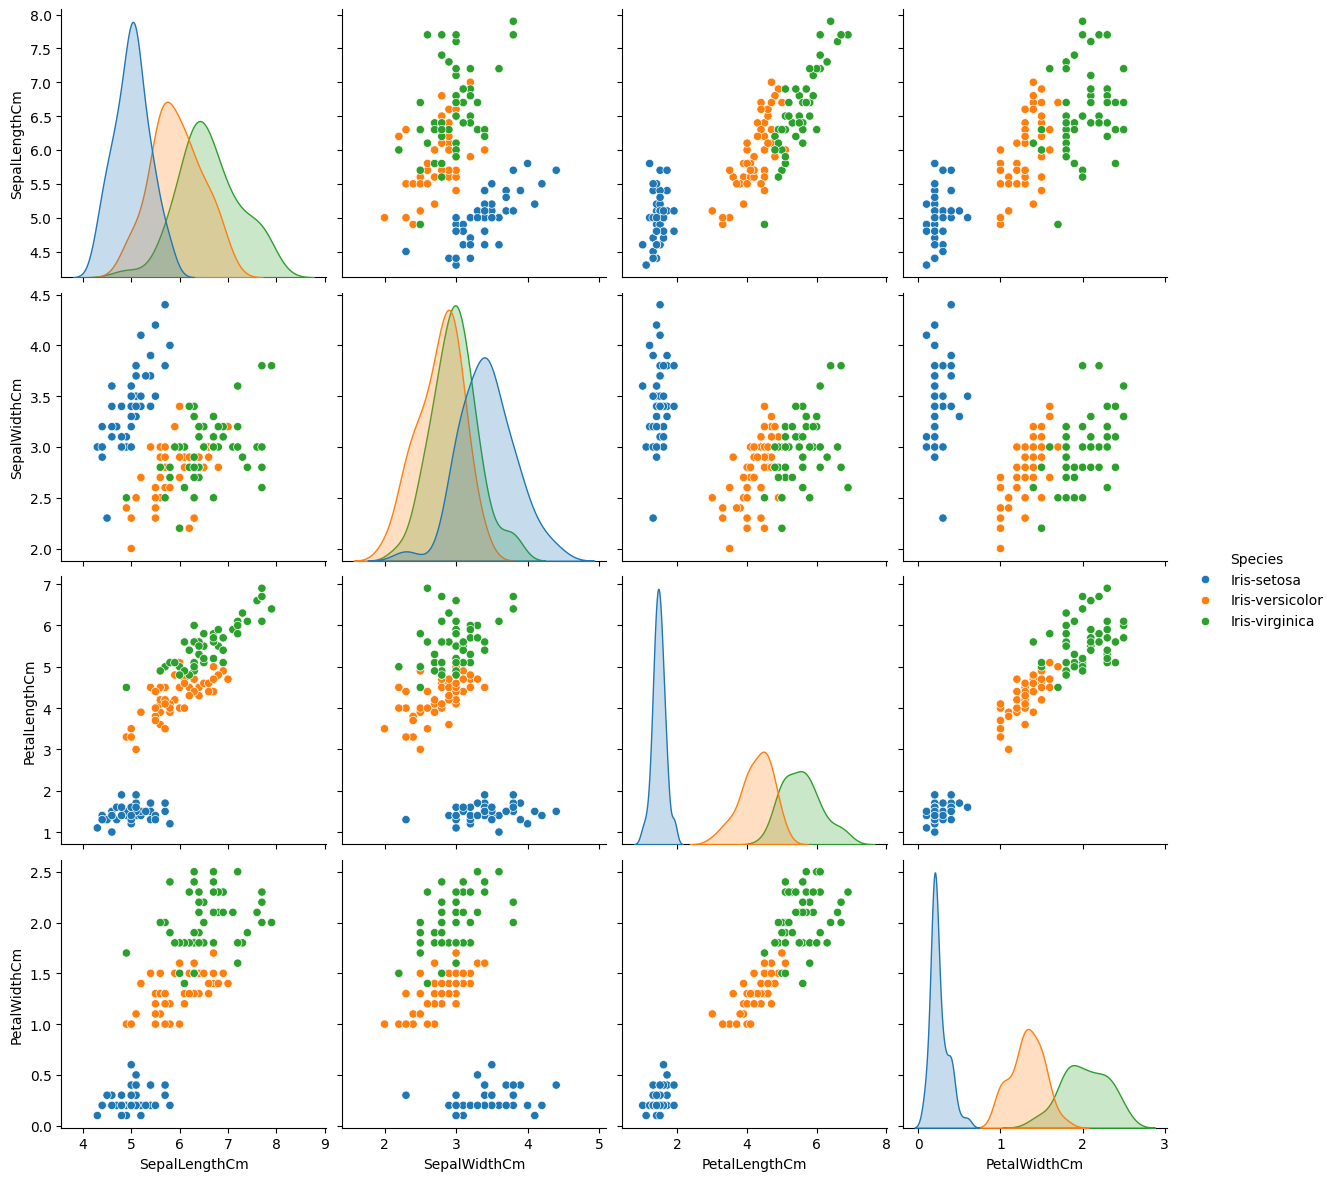

In [ ]:
#Pairplot
#The sns.pairplot() function from seaborn is a powerful tool for visualizing relationships between multiple variables in a dataset.
#It creates a matrix of scatter plots for each pair of variables, along with histograms or KDE plots on the diagonal for each variable’s distribution.
#The hue parameter allows us to color the plots by a categorical variable, making it easier to visualize how different categories (e.g., species) are distributed across the features.
sns.pairplot(df, hue="Species", size=3)

array([[<Axes: title={'center': 'PetalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'PetalWidthCm'}, xlabel='[Species]'>],
       [<Axes: title={'center': 'SepalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

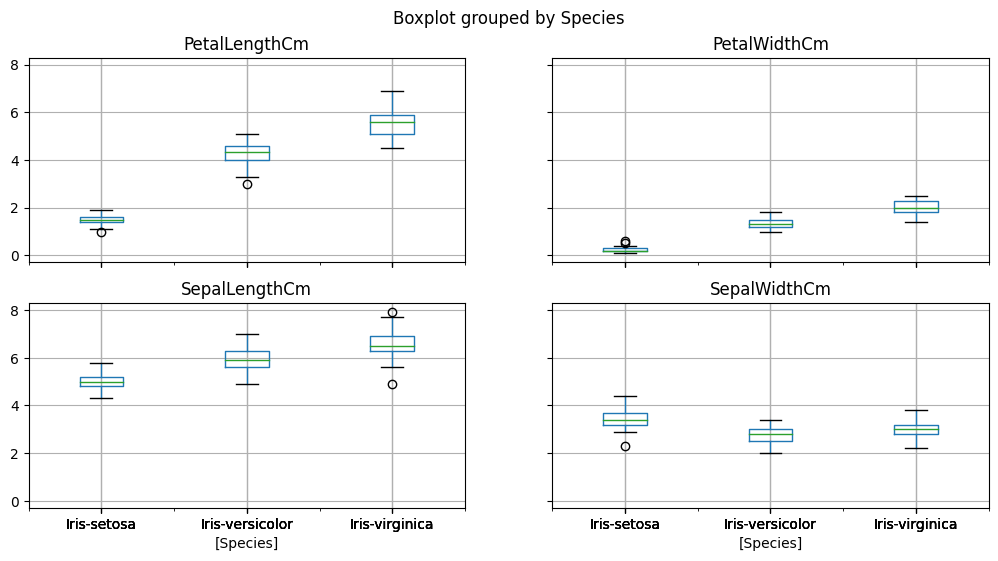

In [ ]:
#Boxplot
#The df.boxplot(by="Species", figsize=(12, 6)) code creates a boxplot for each feature in our DataFrame, grouped by the species.
#Boxplots are useful for visualizing the distribution of data, including its central tendency, variability, and outliers, across different categories.
df.boxplot(by="Species", figsize=(12, 6))

<Axes: >

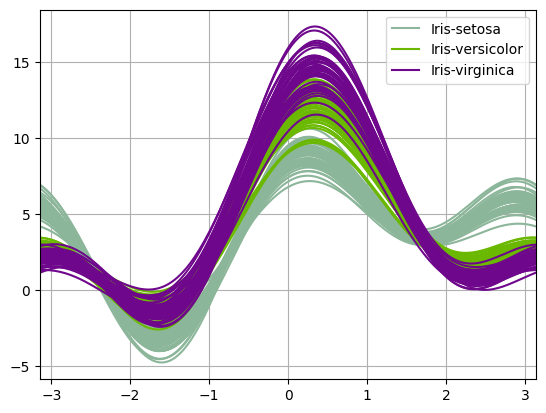

In [ ]:
#Andrews_curves
#Andrews curves are a technique for visualizing high-dimensional data by transforming it into a two-dimensional plot.
#Each line in the plot represents a data point, and the transformation makes it easier to visualize clusters or patterns in high-dimensional data.
import pandas.plotting
from pandas.plotting import andrews_curves
andrews_curves(df, "Species")

<Figure size 1500x1500 with 0 Axes>

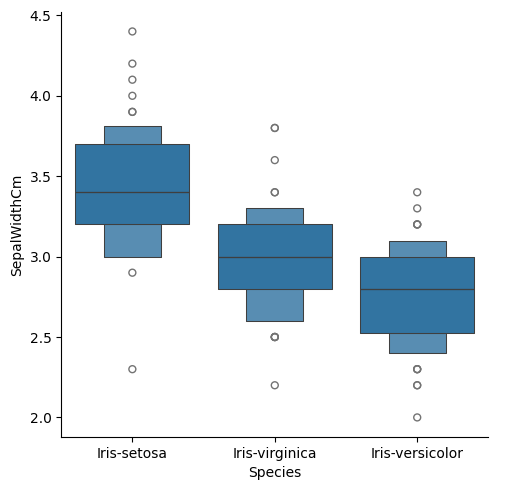

In [ ]:
#CategoricalPlot
#Creates a categorical plot with sns.catplot(), specifically a boxen plot.
#This type of plot is useful for visualizing the distribution of a numerical variable across different categories.
plt.figure(figsize=(15,15))
sns.catplot(x='Species',y='SepalWidthCm',data=df.sort_values('SepalWidthCm',ascending=False),kind='boxen')

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

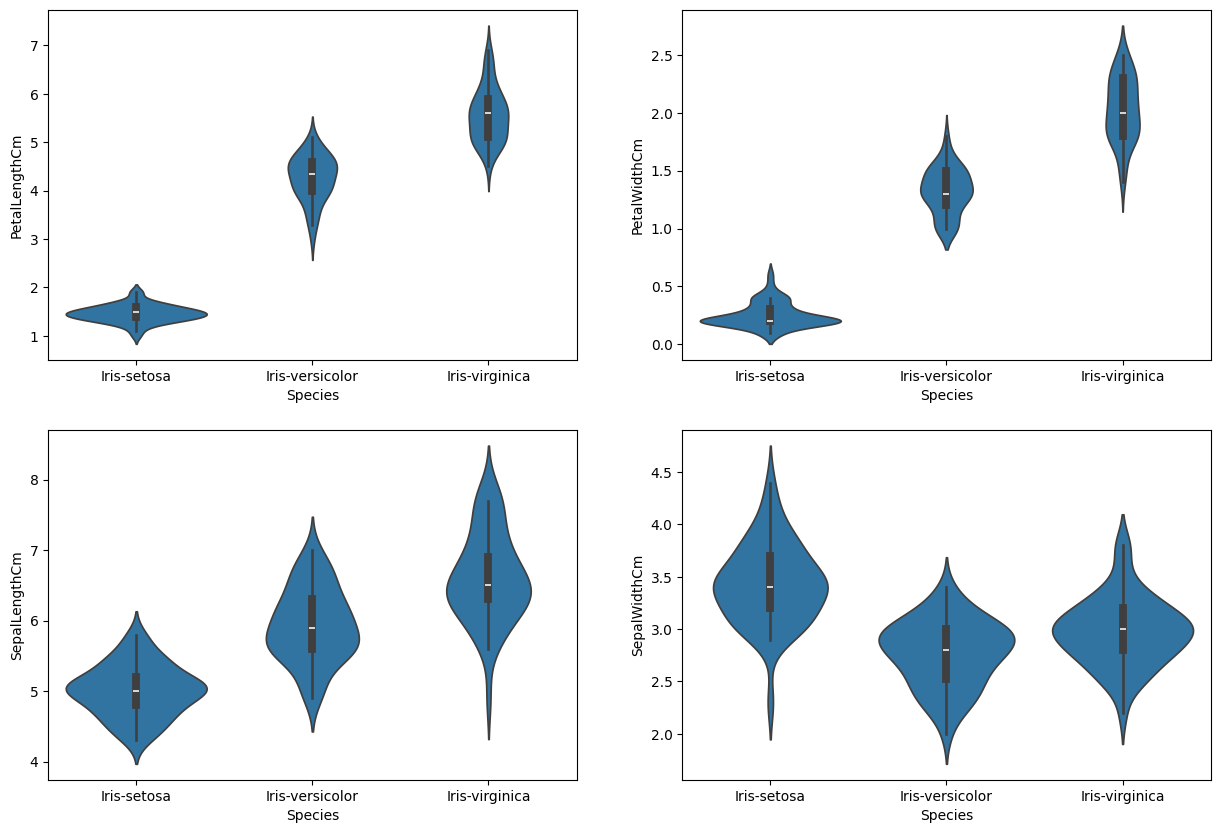

In [ ]:
#Violinplot
#Creates a series of violin plots to visualize the distribution of various features of the Iris dataset across different species.
#The violinplot function in seaborn is used to show the distribution and density of a numerical variable,
#which can be particularly insightful for understanding the spread and central tendencies of the data.
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

In [ ]:
X=df.drop('Species',axis=1)
y=df['Species']

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [ ]:
## Split the dataset into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,stratify=y,random_state=123)

In [ ]:
# Initialize classifiers
knn = KNeighborsClassifier(n_neighbors=3)
dt = DecisionTreeClassifier(random_state=42)
svm = SVC(kernel='linear', random_state=42)
lr = LogisticRegression(max_iter=200, random_state=42)

# Train the classifiers
knn.fit(X_train, y_train)
dt.fit(X_train, y_train)
svm.fit(X_train, y_train)
lr.fit(X_train, y_train)

# Make predictions
knn_pred = knn.predict(X_test)
dt_pred = dt.predict(X_test)
svm_pred = svm.predict(X_test)
lr_pred = lr.predict(X_test)


In [ ]:
# Evaluate the models
target_names = df['Species'].unique()
models = ['K-Nearest Neighbors', 'Decision Tree', 'Support Vector Machine', 'Logistic Regression']
predictions = [knn_pred, dt_pred, svm_pred, lr_pred]

for model, pred in zip(models, predictions):
    print(f"--- {model} ---")
    print(f"Accuracy: {accuracy_score(y_test, pred):.2f}")
    print("Classification Report:")
    print(classification_report(y_test, pred, target_names=target_names))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, pred))
    print("\n")

--- K-Nearest Neighbors ---
Accuracy: 0.96
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.87      0.93        15
 Iris-virginica       0.88      1.00      0.94        15

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45

Confusion Matrix:
[[15  0  0]
 [ 0 13  2]
 [ 0  0 15]]


--- Decision Tree ---
Accuracy: 0.89
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.86      0.80      0.83        15
 Iris-virginica       0.81      0.87      0.84        15

       accuracy                           0.89        45
      macro avg       0.89      0.89      0.89        45
   weighted avg       0.89      0.89      0.89        45

Confusion Mat

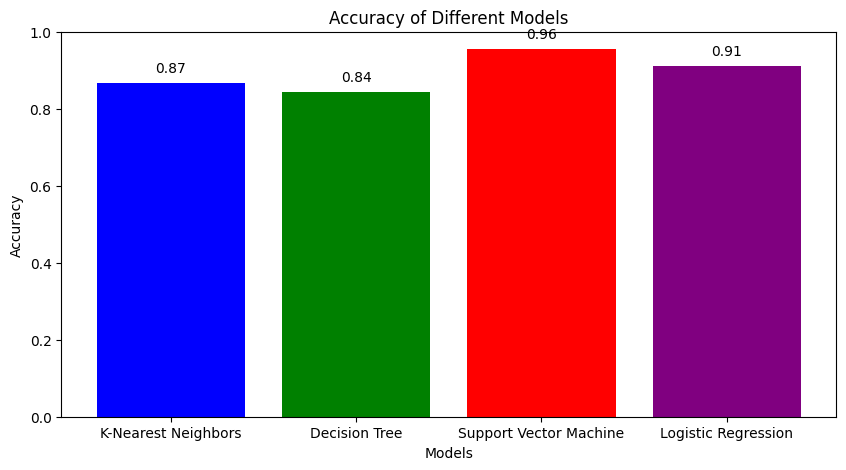

In [ ]:
#Accuracy Bar Plot
import matplotlib.pyplot as plt

# Accuracy for each model
accuracies = [
    accuracy_score(y_test, knn_pred),
    accuracy_score(y_test, dt_pred),
    accuracy_score(y_test, svm_pred),
    accuracy_score(y_test, lr_pred)
]

# Plotting accuracies
plt.figure(figsize=(10, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom')
plt.show()


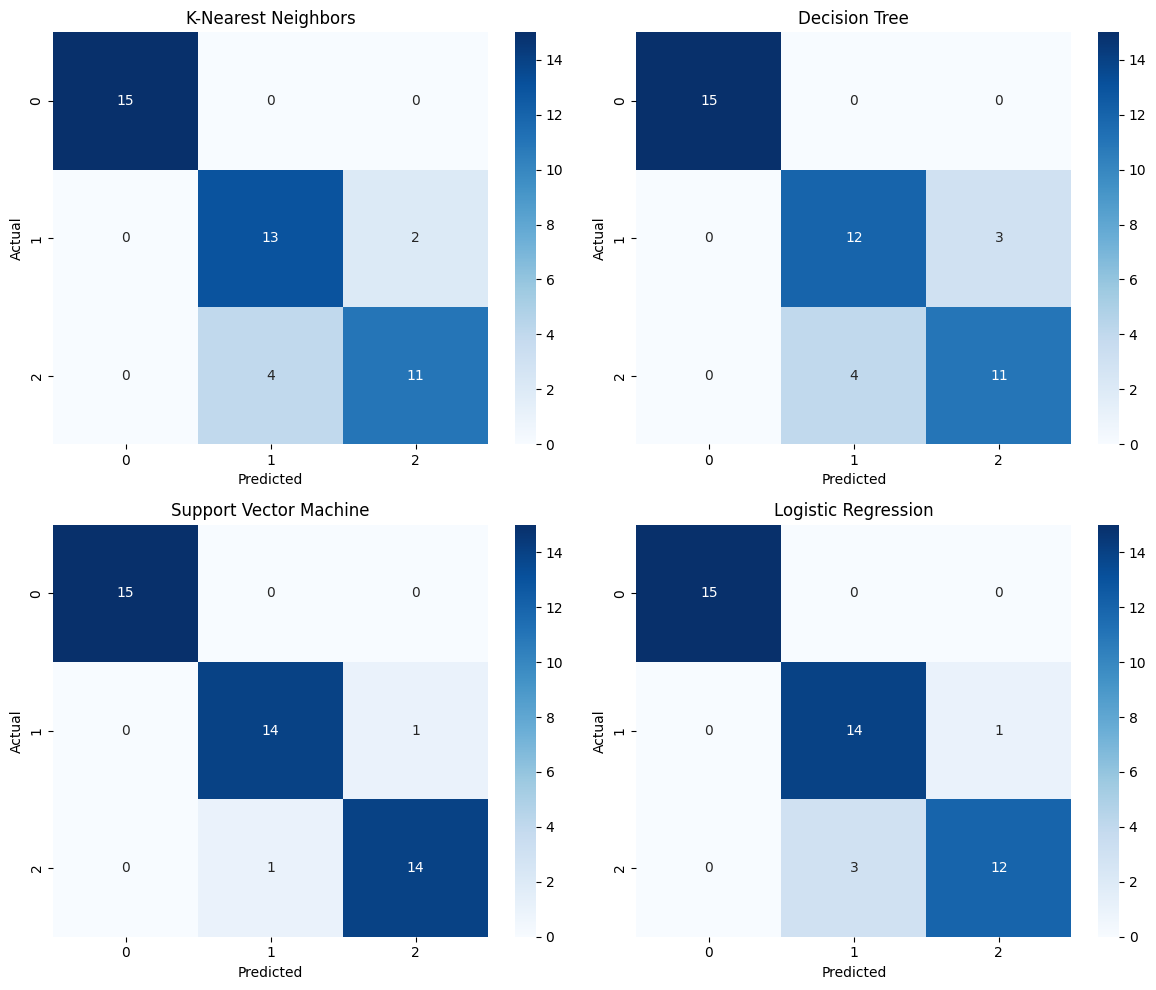

In [ ]:
#Confusion Matrix Heatmaps
import seaborn as sns
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, model, pred in zip(axes.flatten(), models, predictions):
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(model)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

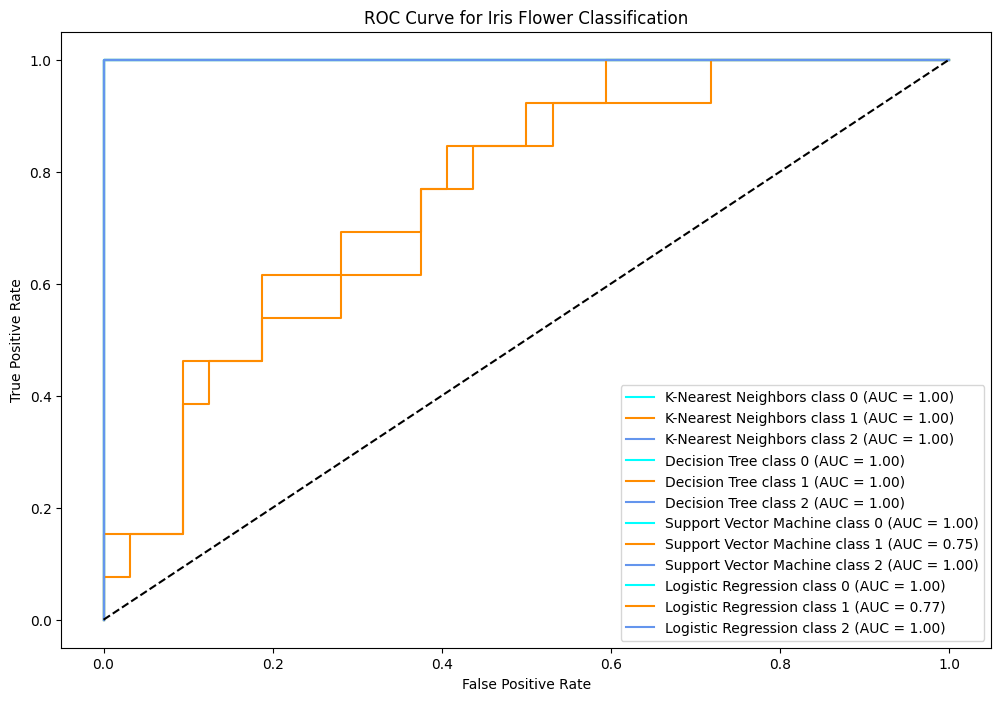

In [ ]:
#ROC Curve and AUC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize


y_binarized = label_binarize(y, classes=[0, 1, 2])
n_classes = y_binarized.shape[1]
plt.figure(figsize=(12, 8))

knn_probas = knn.predict_proba(X_test)
dt_probas = dt.predict_proba(X_test)
svm_probas = svm.predict_proba(X_test)
lr_probas = lr.predict_proba(X_test)

classifiers = {
    'K-Nearest Neighbors': knn_probas,
    'Decision Tree': dt_probas,
    'Support Vector Machine': svm_probas,
    'Logistic Regression': lr_probas
}


colors = ['aqua', 'darkorange', 'cornflowerblue']
for model, probas in classifiers.items():
  for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test[:, i], probas[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} class {i} (AUC = {roc_auc:.2f})', color=colors[i % len(colors)])

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Iris Flower Classification')
plt.legend(loc='best')
plt.show()
